### Project 4 - Step 2 Experiments

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [36]:
from Undistorter import Undistorter
undistorter = Undistorter()

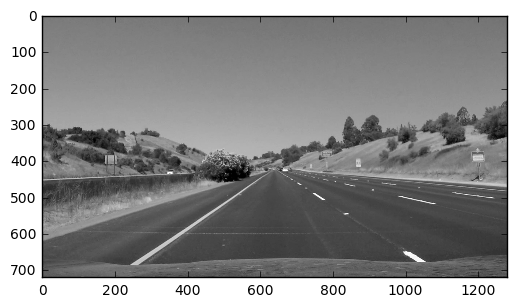

In [37]:
im = mpimg.imread('../test_images/straight_lines1.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap="gray")
plt.show()

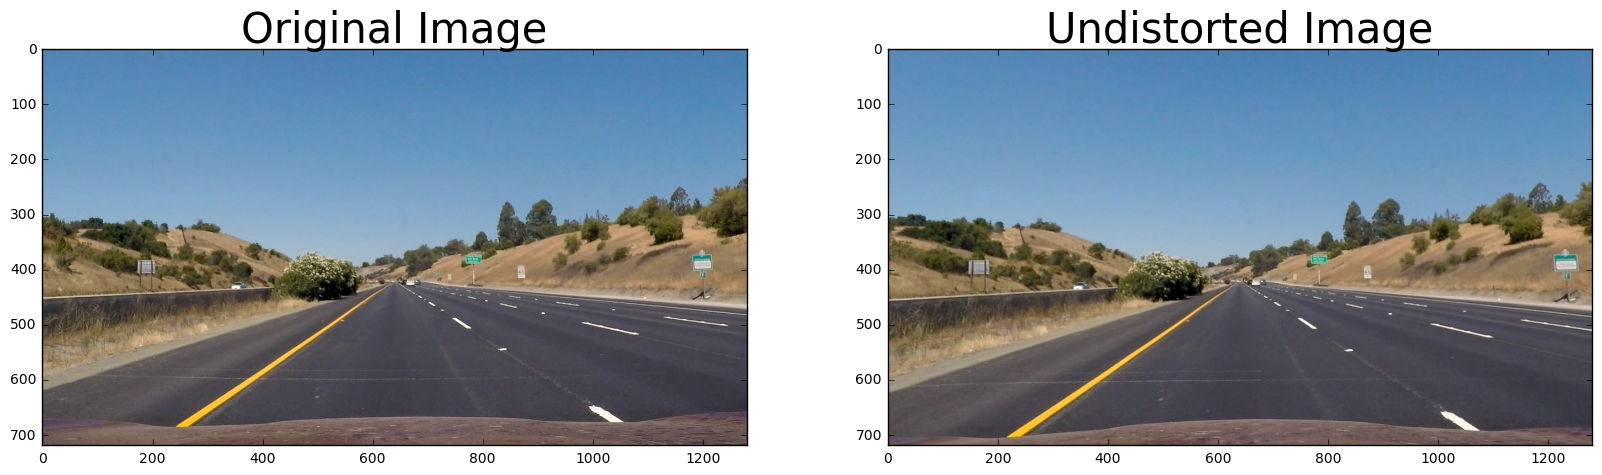

In [38]:
undist = undistorter.undistort(im)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(im)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

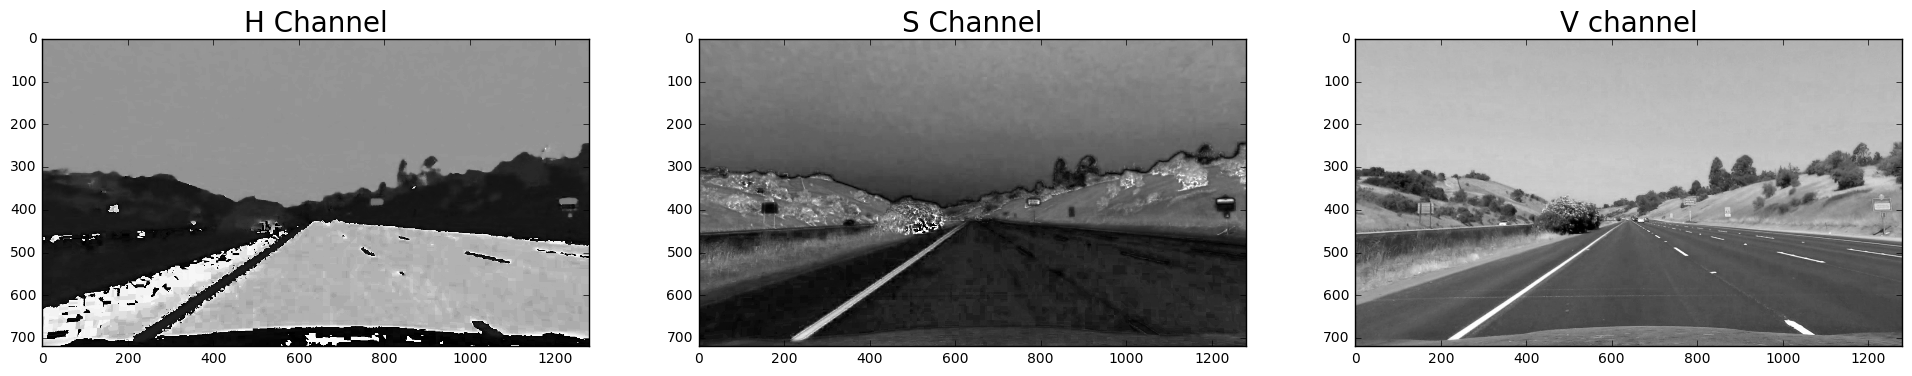

In [39]:
hsv = cv2.cvtColor(undist, cv2.COLOR_RGB2HSV)
hsv_h = hsv_undist[:,:,0]
hsv_s = hsv_undist[:,:,1]
hsv_v = hsv_undist[:,:,2]

f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24, 18))
ax1.imshow(hsv_h,cmap='gray')
ax1.set_title('H Channel',fontsize=20)

ax2.imshow(hsv_s,cmap='gray')
ax2.set_title('S Channel',fontsize=20)

ax3.imshow(hsv_v,cmap='gray')
ax3.set_title('V channel',fontsize=20)
plt.show()

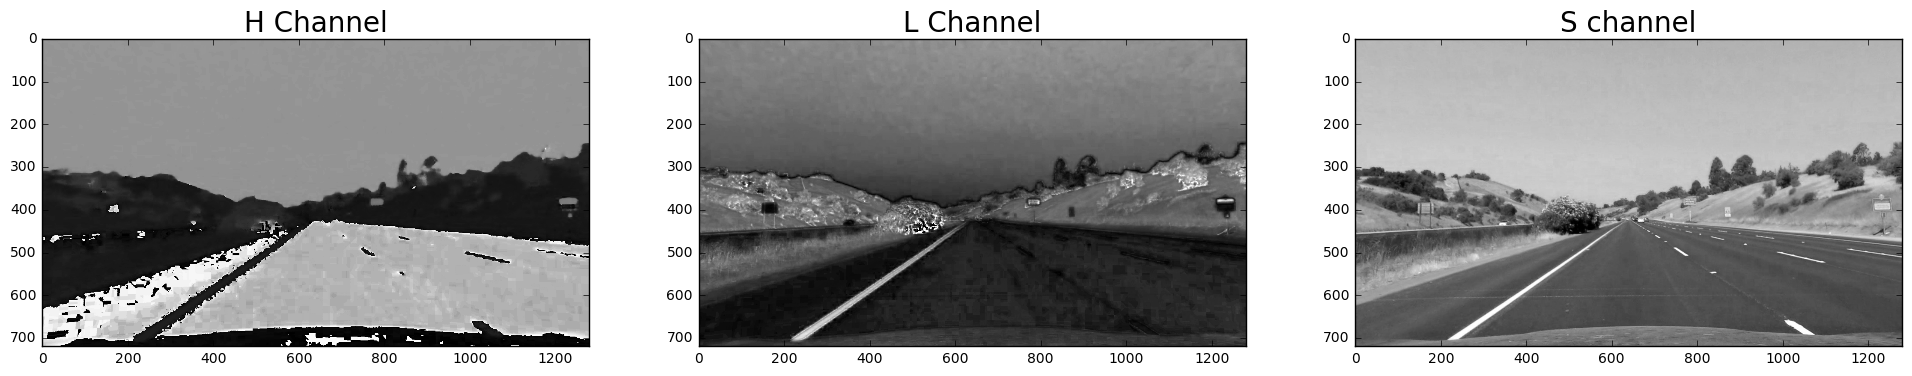

In [40]:
hls = cv2.cvtColor(undist, cv2.COLOR_RGB2HLS)
hls_h = hsv_undist[:,:,0]
hls_l = hsv_undist[:,:,1]
hls_s = hsv_undist[:,:,2]

f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24, 18))
ax1.imshow(hls_h,cmap='gray')
ax1.set_title('H Channel',fontsize=20)

ax2.imshow(hls_l,cmap='gray')
ax2.set_title('L Channel',fontsize=20)

ax3.imshow(hls_s,cmap='gray')
ax3.set_title('S channel',fontsize=20)
plt.show()

In [43]:
def abs_sobel_thresh(color_img,orient = 'x', thresh=(0,255),sobel_kernel=3):
    #gray = cv2.cvtColor(color_img,cv2.COLOR_RGB2GRAY)
    gray = img
    if orient == 'x':
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    if orient == 'y':
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    #print(orient)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(abs_sobel/np.max(abs_sobel)*255.0)
    binary = np.zeros_like(scaled_sobel)
    binary[(scaled_sobel>= thresh[0]) & (scaled_sobel<= thresh[1])] = 1
    return binary

def mag_thresh(img,thresh=(0,255),sobel_kernel=3):
    #gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray = img
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
    #Perform grad mag operation
    abs_sobel = np.sqrt(sobelx**2 + sobely**2)
    scale_sobel = np.uint8(abs_sobel/np.max(abs_sobel)*255)
    binary = np.zeros_like(abs_sobel)
    binary[(abs_sobel >= thresh[0]) & (abs_sobel <= thresh[1])] = 1
    #print(binary)
    return binary

def dir_thresh(img,thresh=(0,np.pi),sobel_kernel=3):
    #gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray = img
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
    #Important: Take absolute of image before performing angle operation
    dir_sobel = np.absolute(np.arctan(np.absolute(sobely),np.absolute(sobelx)))
    
    binary_output = np.zeros_like(dir_sobel)
    binary_output[(dir_sobel>=thresh[0]) & (dir_sobel<=thresh[1])] = 1
    
    return binary_output

def value_thresh(img,thresh):
    #expects a grey-scale value image, not color
    binary_output = np.zeros_like(img)
    binary_output[(img > thresh[0]) & (img < thresh[1])] = 1
    return binary_output

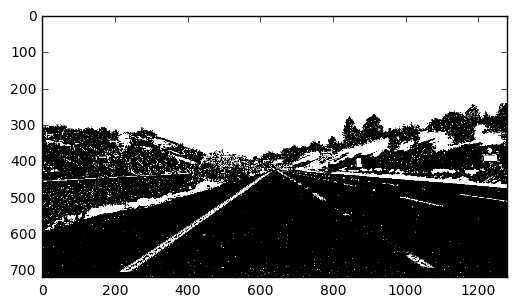

In [45]:
img = hls_s
gradx_img= abs_sobel_thresh(img,orient= 'x',thresh=(20,100))
grady_img= abs_sobel_thresh(img,orient= 'y',thresh=(20,100))
mag_img = mag_thresh(img, thresh=(20, 100))
angle_img = dir_thresh(img, thresh=(.7, 1.3))
value_img = value_thresh(img, thresh=(170, 255))

combined_img = np.zeros_like(angle_img)
combined_img[(value_img ==1)|(((gradx_img == 1) & (grady_img ==1)) | ((mag_img==1) & (angle_img==1)))] = 1

plt.imshow(combined_img, cmap="gray")
plt.show()